## Section 1: Image Classification with PyTorch

In [1]:
#Importing the necessary libraries
import torch  #Core PyTorch library
import torch.nn as nn #For building neural networks
import torch.optim as optim  #For optimizers (to train the model)
import torchvision  #For datasets and transforms (like loading MNIST).
import torchvision.transforms as transforms
import matplotlib.pyplot as plt #Visualizations
import numpy as np

In [2]:
#Load the MNIST Dataset
# Define transformations: Convert to tensor and normalize
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load training dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Load test dataset
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 343kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.21MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.19MB/s]


In [6]:
#Prints the various classes in our MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
classes = train_dataset.classes
print(classes)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


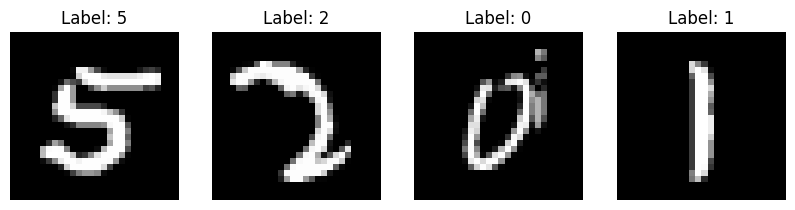

In [3]:
#Visualizations
# Get a batch of images and labels
images, labels = next(iter(train_loader))

# Plot 4 images
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for i in range(4):
    axes[i].imshow(images[i][0].numpy(), cmap='gray')  # images[i][0] because it's a 1-channel grayscale image
    axes[i].set_title(f'Label: {labels[i].item()}')
    axes[i].axis('off')
plt.show()

In [7]:
#Build the Neural Network Model
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input: 784, Output: 128
        self.fc2 = nn.Linear(128, 10)       # Input: 128, Output: 10 (classes)
    
    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = torch.relu(self.fc1(x))  # Hidden layer with ReLU
        x = self.fc2(x)  # Output layer: 10 neurons (one for each digit 0-9)
        return x

# Initialize the model
model = SimpleNet()

In [8]:
#Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Learning rate = 0.001

In [9]:
#Train the Model
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
    
    print(f'Epoch [{epoch+1}/{num_epochs}] Average Loss: {running_loss / len(train_loader):.4f}')

Epoch [1/5], Step [100/938], Loss: 0.3634
Epoch [1/5], Step [200/938], Loss: 0.2870
Epoch [1/5], Step [300/938], Loss: 0.3487
Epoch [1/5], Step [400/938], Loss: 0.2626
Epoch [1/5], Step [500/938], Loss: 0.1895
Epoch [1/5], Step [600/938], Loss: 0.3006
Epoch [1/5], Step [700/938], Loss: 0.4849
Epoch [1/5], Step [800/938], Loss: 0.1618
Epoch [1/5], Step [900/938], Loss: 0.1172
Epoch [1/5] Average Loss: 0.3804
Epoch [2/5], Step [100/938], Loss: 0.2476
Epoch [2/5], Step [200/938], Loss: 0.1829
Epoch [2/5], Step [300/938], Loss: 0.2085
Epoch [2/5], Step [400/938], Loss: 0.1812
Epoch [2/5], Step [500/938], Loss: 0.1830
Epoch [2/5], Step [600/938], Loss: 0.0738
Epoch [2/5], Step [700/938], Loss: 0.1969
Epoch [2/5], Step [800/938], Loss: 0.1056
Epoch [2/5], Step [900/938], Loss: 0.2575
Epoch [2/5] Average Loss: 0.1996
Epoch [3/5], Step [100/938], Loss: 0.1619
Epoch [3/5], Step [200/938], Loss: 0.1105
Epoch [3/5], Step [300/938], Loss: 0.1932
Epoch [3/5], Step [400/938], Loss: 0.1913
Epoch [3/5

## Analysis of Training Results:
The output shows the training loss for each epoch (1 to 5) at intervals of 100 batches (out of 938 batches per epoch, based on a batch size of 64 and 60,000 training images). The average loss per epoch is also provided.
* Decreasing Loss Over Epochs:

Epoch 1: Average Loss = 0.3804
Epoch 2: Average Loss = 0.1996
Epoch 3: Average Loss = 0.1442
Epoch 4: Average Loss = 0.1147
Epoch 5: Average Loss = 0.0969

The average loss decreases consistently across epochs, indicating that the model is learning and improving its ability to classify digits. This is a good sign of effective training.

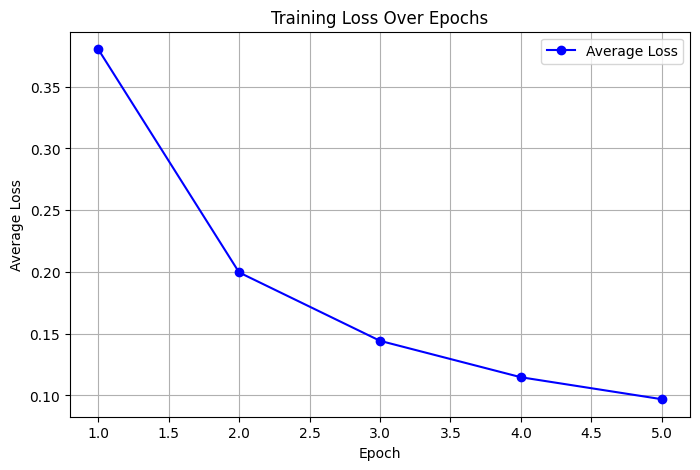

In [11]:
#Visualizing Training Progress
# Data from training output
epochs = [1, 2, 3, 4, 5]
avg_losses = [0.3804, 0.1996, 0.1442, 0.1147, 0.0969]

# Create the line plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, avg_losses, marker='o', linestyle='-', color='b', label='Average Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
#Evaluate the Model
correct = 0
total = 0
with torch.no_grad():  # No gradients needed for evaluation
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)  # Get class with highest score
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 96.87%


## Analysis of Test Accuracy
Test Accuracy (96.87%): This is excellent for a basic feedforward neural network on MNIST. It indicates the model correctly classifies nearly 97% of the test images (10,000 digits).

## Section 2: Image Classification with TensorFlow

In [6]:
#Import the necessary Libararies
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#Load the MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to 0-1
mnist_train_images = mnist_train_images / 255.0
mnist_test_images = mnist_test_images / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


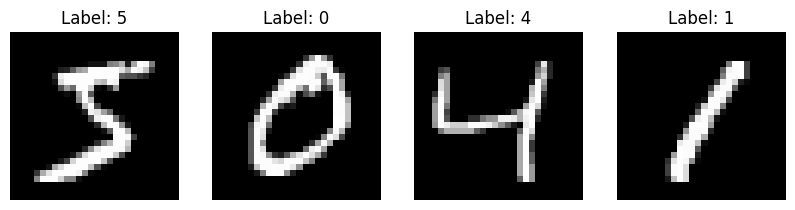

In [9]:
#Visualization
# Plot 4 images
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for i in range(4):
    axes[i].imshow(mnist_train_images[i], cmap='gray')
    axes[i].set_title(f'Label: {mnist_train_labels[i]}')
    axes[i].axis('off')
plt.show()

In [10]:
#Build the Neural Network Model
from tensorflow.keras.models import Sequential
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten input - Convert 28x28 to 784
    layers.Dense(128, activation='relu'),  # Hidden layer
    layers.Dense(10, activation='softmax') # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1755088544.218382      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1755088544.219092      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [11]:
#Train the Model
history = model.fit(mnist_train_images, mnist_train_labels, epochs=5, validation_split=0.2)  # Use 20% for validation

Epoch 1/5


I0000 00:00:1755088655.136412     105 service.cc:148] XLA service 0x7b4d74008230 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755088655.137962     105 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1755088655.137982     105 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1755088655.397117     105 cuda_dnn.cc:529] Loaded cuDNN version 90300


  77/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5451 - loss: 1.4655

I0000 00:00:1755088656.365646     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8651 - loss: 0.4715 - val_accuracy: 0.9545 - val_loss: 0.1562
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9607 - loss: 0.1381 - val_accuracy: 0.9670 - val_loss: 0.1143
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9738 - loss: 0.0888 - val_accuracy: 0.9687 - val_loss: 0.1023
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9806 - loss: 0.0646 - val_accuracy: 0.9710 - val_loss: 0.0988
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9863 - loss: 0.0467 - val_accuracy: 0.9734 - val_loss: 0.0927


# Analysis of TensorFlow Training Results
The output shows metrics for 5 epochs, with 1500 steps per epoch (consistent with 48,000 training images, 20% validation split, and a default batch size of 32 in Keras).
Training Performance:
* Training Loss: Decreases from 0.4715 (Epoch 1) to 0.0467 (Epoch 5), showing the model is learning effectively.
* Training Accuracy: Improves from 86.51% to 98.63%, indicating strong performance on the training set.
Validation Performance:
* Validation Loss: Drops from 0.1562 to 0.0927, suggesting good generalization.
* Validation Accuracy: Increases from 95.45% to 97.34%, which is excellent
Overfitting Check:
* Validation loss (0.0927) is slightly higher than training loss (0.0467) in Epoch 5, and validation accuracy (97.34%) is slightly lower than training accuracy (98.63%). This small gap suggests minimal overfitting, but it’s worth monitoring.

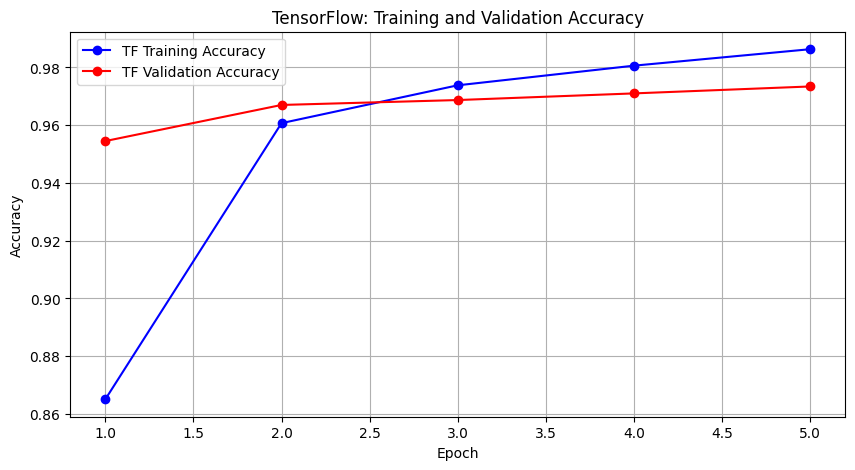

In [15]:
#Visualizing TensorFlow Training Progress
## TensorFlow training data from your output
epochs = [1, 2, 3, 4, 5]
tf_train_loss = [0.4715, 0.1381, 0.0888, 0.0646, 0.0467]
tf_val_loss = [0.1562, 0.1143, 0.1023, 0.0988, 0.0927]
tf_train_acc = [0.8651, 0.9607, 0.9738, 0.9806, 0.9863]
tf_val_acc = [0.9545, 0.9670, 0.9687, 0.9710, 0.9734]

plt.figure(figsize=(10, 5))
plt.plot(epochs, tf_train_acc, marker='o', linestyle='-', color='b', label='TF Training Accuracy')
plt.plot(epochs, tf_val_acc, marker='o', linestyle='-', color='r', label='TF Validation Accuracy')
plt.title('TensorFlow: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [16]:
#Evaluate the Model
test_loss, test_acc = model.evaluate(mnist_test_images, mnist_test_labels)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9705 - loss: 0.0937
Test Accuracy: 97.54%


## Analysis of TensorFlow Test Results
Test Accuracy (97.54%): is a strong result for your simple feedforward neural network
Test Loss (0.0937): The low test loss aligns with your training (0.0467) and validation (0.0927) losses from Epoch 5, suggesting good generalization with minimal overfitting.

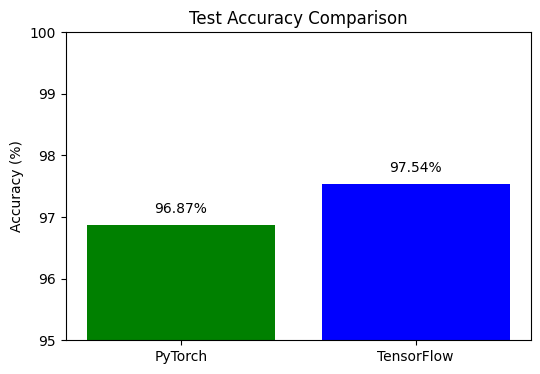

In [20]:
#Compare PyTorch and TensorFlow Test Results
plt.figure(figsize=(6, 4))
frameworks = ['PyTorch', 'TensorFlow']
accuracies = [96.87, 97.54]
plt.bar(frameworks, accuracies, color=['g', 'b'])
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(95, 100)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.2, f'{v}%', ha='center')
plt.show()

### Conclusion :TensorFlow model’s test accuracy of 97.54% is slightly better than PyTorch’s 96.87%.